### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

In [116]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import sympy
plt.style.use('ggplot')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [77]:
avia_df = pd.read_csv("../data/2008.csv")

Посмотрим какие столбцы есть в таблице

In [78]:
print(avia_df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

Названия перевозчиков - слева (в первом столбце)

In [79]:
avia_df['UniqueCarrier'].value_counts().iloc[:10]

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

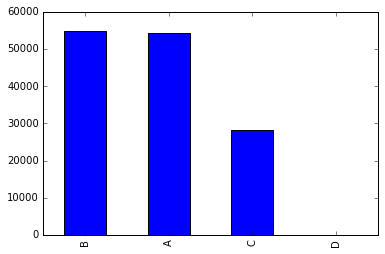

In [80]:
avia_df['CancellationCode'].value_counts().plot(kind='bar')

A -	Carrier;
B -	Weather;
C -	National Air System;
D -	Security;

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

Для начала, найдем самый популярный маршрут (предполагается, что маршрут включает в себя как точку отправления, так и точку прилета)

In [81]:
grouped_path = avia_df.groupby(['Origin','Dest'])
top_path = grouped_path.size().sort_values(ascending = False).iloc[:1]
top_path

Origin  Dest
SFO     LAX     13788
dtype: int64

Как видим, самый популярный маршрут - (SFO     LAX), выведем статистику по нему:

In [82]:
grouped_path.get_group(('SFO','LAX')).describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

Если использовать groupby для двух переменных, то результат будет не верным (получим топ-5 рейсов, принадлежащих конкретному первозчику)

In [83]:
avia_df.groupby(['FlightNum'])['CarrierDelay'].sum()\
.sort_values(ascending = False).iloc[0:5] 

FlightNum
73     22176
12     22097
36     20300
21     19367
283    19328
Name: CarrierDelay, dtype: float64

In [84]:
avia_df.groupby(['FlightNum'])['WeatherDelay'].sum()\
.sort_values(ascending = False).iloc[0:5]

FlightNum
539     11177
5685     6132
5257     5987
648      5242
653      4862
Name: WeatherDelay, dtype: float64

In [85]:
avia_df.groupby(['FlightNum'])['NASDelay'].sum()\
.sort_values(ascending = False).iloc[0:5]

FlightNum
378    29875
524    28593
7      26591
16     26322
75     26267
Name: NASDelay, dtype: float64

In [86]:
avia_df.groupby(['FlightNum'])['SecurityDelay'].sum()\
.sort_values(ascending = False).iloc[0:5]

FlightNum
52      780
1256    597
2877    489
467     440
167     438
Name: SecurityDelay, dtype: float64

In [87]:
avia_df.groupby(['FlightNum'])['LateAircraftDelay'].sum()\
.sort_values(ascending = False).iloc[0:5]

FlightNum
52     38157
29     34109
527    34042
547    33443
50     33431
Name: LateAircraftDelay, dtype: float64

Для того чтобы найти информацию по конкретному рейсу, напишите его ниже, запустив сроку ниже

In [210]:
carrier_df = avia_df.set_index(['FlightNum', 'UniqueCarrier'])
carrier_df = carrier_df.sort_index(level = 0)
flight_num = int(input())
carrier_df.loc[flight_num]

50


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
UniqueCarrier,,,,,,,,,,,,,,,,,,,,,
B6,2008,1,1,2,2024,1940,2245,2218,N565JB,141,...,15,0,NaN,0,27,0,0,0,0,2008-01-01
B6,2008,1,2,3,2002,1940,2238,2218,N594JB,156,...,13,0,NaN,0,15,0,0,0,5,2008-01-02
B6,2008,1,3,4,2131,1940,22,2218,N607JB,171,...,20,0,NaN,0,5,0,13,0,106,2008-01-03
B6,2008,1,4,5,2040,1940,2319,2218,N564JB,159,...,17,0,NaN,0,23,0,1,0,37,2008-01-04
B6,2008,1,5,6,2006,1940,2237,2218,N520JB,151,...,17,0,NaN,0,0,0,0,0,19,2008-01-05
B6,2008,1,6,7,2010,1940,2306,2218,N655JB,176,...,25,0,NaN,0,0,0,18,0,30,2008-01-06
B6,2008,1,7,1,2000,1940,2241,2218,N652JB,161,...,16,0,NaN,0,13,0,3,0,7,2008-01-07
B6,2008,1,8,2,2001,1940,2242,2218,N656JB,161,...,17,0,NaN,0,11,0,3,0,10,2008-01-08
B6,2008,1,9,3,2048,2050,2326,2328,N563JB,158,...,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-09


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

In [92]:
avia_df['DepTime'].describe()

count    6873482.000000
mean        1333.830046
std          478.068895
min            1.000000
25%          928.000000
50%         1325.000000
75%         1728.000000
max         2400.000000
Name: DepTime, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162c4438>]], dtype=object)

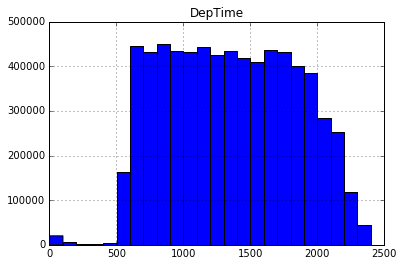

In [93]:
avia_df.hist('DepTime', bins=24)

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

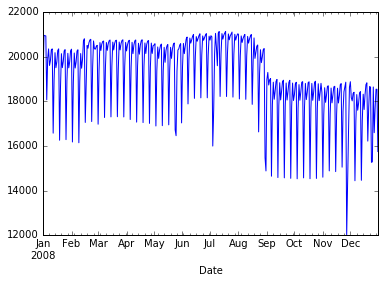

In [94]:
avia_df['Date'] = pd.to_datetime(avia_df.Year*10000 + 
                                    avia_df.Month*100 + 
                                    avia_df.DayofMonth, 
                            format='%Y%m%d')
num_flights_by_date = avia_df.groupby('Date')['FlightNum'].agg('count')
num_flights_by_date.plot()

### 2. Продолжаем изучать Pandas

In [ ]:
fbi13_df = pd.read_csv("../data/table13.csv")
fbi14_df = pd.read_csv("../data/table14.csv")

In [ ]:
fbi13_df.columns

In [ ]:
fbi14_df.columns

In [ ]:
state13 = pd.DataFrame(np.unique(fbi13_df[['State']]))
state14 = pd.DataFrame(np.unique(fbi14_df[['State']]))
eq = state13.isin(state14)
eq.iloc[::len(eq)-1]

Как видим, в последней клетке стоит значение 'False', значит на каком-то этапе произошло смещение, то есть в этих таблица штаты разные

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [ ]:
fbi_df = pd.concat([fbi13_df, fbi14_df])
fbi_df

**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

Переименуем названия аналогичных столбцов в двух таблицах в одинаковые, иначе столкнемся с тем, что все значения в таблице заменены на Na

In [ ]:
fbi14_df=fbi14_df.rename(columns={'Q1' : '1st quarter', 'Q2' : '2nd quarter',\
                                  'Q3': '3rd quarter', 'Q4' : '4th quarter',\
                                  'Agency Type' : 'Agency type',\
                                  'Agency Name' : 'Agency name'})

In [ ]:
na_df = fbi_df.dropna()
na_df

**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [ ]:
indexed_df = na_df.set_index(['State', 'Agency type'])
indexed_df

**Задание 5:** В Pandas можно итерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [165]:
new_df = fbi_df.loc[fbi_df['State'].isin(['Alabama', 'Alaska', 'Wisconsin'])] 
new_grouped = list(new_df.groupby(['State', 'Agency type'])) 
for i, grp in new_grouped: 
    print(*i, grp['Population'].sum())

Alabama Cities 39,48184,13935,15494,1262,1771,92657,9701,1245,1116077,2401,01528,1452,87116,84715,61536,6104,5015,2228,3883,173184,73812,45214,1852,9822,0922,476250,55713,4316,6616,69822,1999,6831,9401,7554,17524812,7626,3232,42520,235
Alabama Metropolitan Counties nan
Alabama Nonmetropolitan Counties nan
Alabama Universities and Colleges 3,73411,1774,943
Alaska Cities 299,4556,4639852,2731,2632,43832,5052,5615,30932,9467,4228,3056,5643,3753,8052,2369,6746,4532,9812,7499,0939564,4184,3404,0328,6452202,414
Alaska Other Agencies nan
Alaska State Police Agencies nan
Alaska Universities and Colleges 17,4979,223
Wisconsin Cities 3,14373,14110,50243,042105,10763,60351,741242,5239,427600,80535,04615,2279,62339,1761,9241,0157597,0182,8597,9882,9508,09717,1451,1006361,49412,0471,2383,3914884,41816,3262,43636,8177,6655,5191,2993,5711,3678263,5446,3198923,2161,2343,1933,27037,9966,12612,1141,83824,6811,9884,4191,09411,4465982,2033,97513,6761,4972,1384,4854,1175,0177851,4736,4781,9143,6712,06618,3

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [95]:
honda_df = pd.read_csv("../data/accord_sedan_training.csv")
print(honda_df.columns)

Index(['price', 'mileage', 'year', 'trim', 'engine', 'transmission'], dtype='object')


In [96]:
A = honda_df.as_matrix(['mileage']) 
X = np.insert(A, 0, 1, axis = -1) 
X = matrix(X)
type(X)

numpy.matrixlib.defmatrix.matrix

In [97]:
y = honda_df.as_matrix(['price']) 
y = y.flatten()
type(y)

numpy.ndarray

Посмотрим, как расположены данные

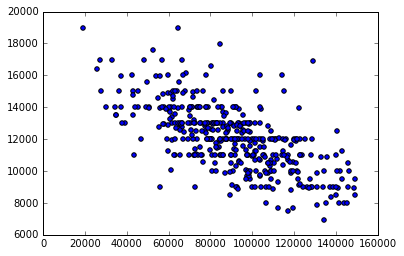

In [98]:
plt.scatter(honda_df['mileage'], honda_df['price'])

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

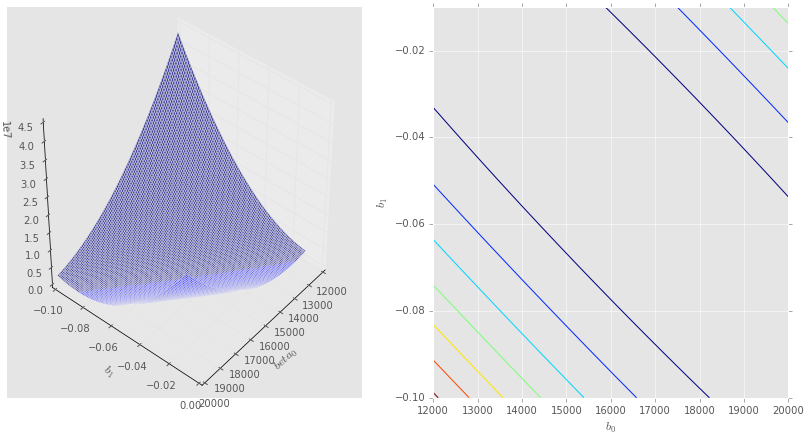

In [202]:
beta0 = np.linspace(12000, 20000, 1001)
beta1 = np.linspace(-0.1, -0.01, 1001)
b0 = sympy.Symbol('b1')
b1 = sympy.Symbol('b2')
B = np.array([b0,b1])
dev = X.dot(B) - y
L = 0
n = dev.size
for i in range(n):
    L += (dev[0,i])**2/(2*n)
b0x, b1y = np.meshgrid(beta0, beta1)
func = lambdify([b0,b1], L, 'numpy')

fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(1, 2, 1, projection ='3d')
ax.view_init(40,40)
ax.plot_surface(b0x, b1y, func(b0x, b1y), alpha = 0.7)
ax.set_xlabel('$beta_0$')
ax.set_ylabel('$b_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(b0x, b1y, func(b0x, b1y))
ax.set_xlabel('$b_0$')
ax.set_ylabel('$b_1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [200]:
alpha0 = 0.001
alpha1 = 0.0000000001
start0 = 0
start1 = 0
present0 = 1
present1 = 1
accuracy = 0.001
iter_max = 99999999
i = 0
der0 = L.diff(b0)
der1 = L.diff(b1)
f0 = lambdify([b0, b1], der0)
f1 = lambdify([b0, b1], der1)
while (abs(present0 - start0) > accuracy or abs(present1 - start1) > accuracy) and i < iter_max:
    start0 = present0
    start1 = present1
    step0 = alpha0*f0(present0, present1)
    step1 = alpha1*f1(present0, present1)
    present0 = start0 - step0
    present1 = start1 - step1

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [201]:
print('b0 =' , present0 , '; b1 =' , present1)

b0 = 16749.035577131268 ; b1 = -0.052000587956912196


Найдя значения $(\beta_0, \beta_1)$ можно построить прямую, которая "обобщает" данные.

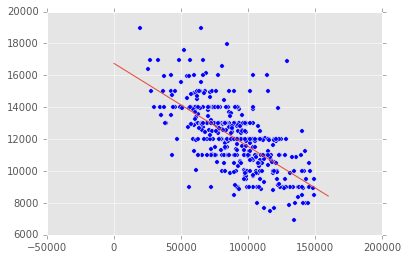

In [199]:
point = plt.scatter(honda_df['mileage'], honda_df['price'])
x = np.linspace(0, 160000, 160000)
regr = present0 + present1*x
plt.plot(regr)